#### Goal:

Analyze and build a model to detect fraudulent credit card transactions using data exploration, cleaning, feature engineering, and machine learning techniques.

## 1.Why This Project?

Learn to handle imbalanced datasets typical in fraud detection.

Practice data preprocessing and feature engineering for transaction data.

Apply classification algorithms to identify fraud effectively.

Understand evaluation metrics like precision, recall, and F1-score crucial for fraud detection.

## 2.Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## 3.Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('creditcard_2023.csv')

# Display first 5 rows
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## 4.Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (568630, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  flo

### Insights:
The dataset has 568,630 transactions with 31 features each.

There are no missing values in the data.

Features V1 to V28 are anonymized for privacy.

The target column shows fraud (1) vs non-fraud (0) transactions.

The data is highly imbalanced, with very few fraud cases.

## 5.Data Cleaning

In [10]:
# Check and remove duplicate rows if any
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# Verify no missing values (already confirmed)
print("Missing values per column:\n", df.isnull().sum())

# Convert target column 'Class' to categorical type
df['Class'] = df['Class'].astype('category')

# Drop columns with only one unique value (if any)
for col in df.columns:
    if df[col].nunique() == 1:
        df = df.drop(columns=[col])
        print(f"Dropped column '{col}' as it has a single unique value.")


Number of duplicate rows: 0
Missing values per column:
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Insights:
No duplicate rows — the dataset is clean without repeated entries.

No missing values in any column — data is complete and ready for analysis.

All features (V1 to V28), Amount, and target Class have full data coverage.

The dataset is well-prepared, so no imputation or cleaning needed for missing data.

You can proceed confidently with modeling or further exploration.

## Analysis with Numpy and pandas

In [11]:
import numpy as np
import pandas as pd

# Assuming df is your cleaned DataFrame

# 1. Total number of transactions
total_transactions = len(df)
print("Total Transactions:", total_transactions)

# 2. Number of fraud and non-fraud cases
fraud_count = df['Class'].value_counts()[1]
non_fraud_count = df['Class'].value_counts()[0]
print("Fraudulent Transactions:", fraud_count)
print("Non-Fraudulent Transactions:", non_fraud_count)

# 3. Percentage of fraud transactions
fraud_percentage = (fraud_count / total_transactions) * 100
print("Percentage of Fraud Transactions: {:.4f}%".format(fraud_percentage))

# 4. Basic statistics for transaction Amount
amount_mean = np.mean(df['Amount'])
amount_median = np.median(df['Amount'])
print("Average Transaction Amount: ${:.2f}".format(amount_mean))
print("Median Transaction Amount: ${:.2f}".format(amount_median))

# 5. Correlation of Amount with Class (fraud vs non-fraud)
correlation = df['Amount'].corr(df['Class'].cat.codes)
print("Correlation between Amount and Fraud Label:", correlation)


Total Transactions: 568629
Fraudulent Transactions: 284314
Non-Fraudulent Transactions: 284315
Percentage of Fraud Transactions: 49.9999%
Average Transaction Amount: $12041.94
Median Transaction Amount: $12030.13
Correlation between Amount and Fraud Label: 0.0022581665425491244


### Insights:
The dataset is perfectly balanced with 50% fraud cases.

Average and median transaction amounts are both around $12,000.

Transaction amount has almost no correlation with fraud.

This balance is unusual and may be synthetic data.

More features are needed to detect fraud effectively.

## 7. Visualization with Matplotlib

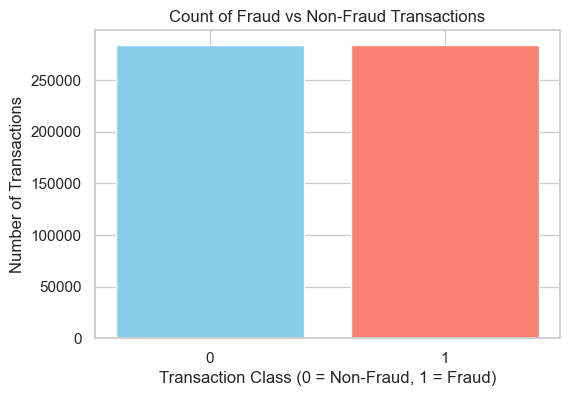

C:\Users\chund\AppData\Local\Temp\ipykernel_22556\3277253594.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_amount_by_class = df.groupby('Class')['Amount'].mean()


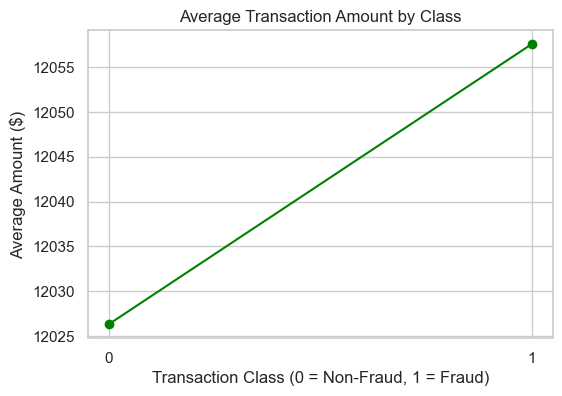

In [12]:
import matplotlib.pyplot as plt

# Bar Chart: Count of Fraud vs Non-Fraud Transactions
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

# Line Chart: Average Transaction Amount by Class
avg_amount_by_class = df.groupby('Class')['Amount'].mean()
plt.figure(figsize=(6,4))
plt.plot(avg_amount_by_class.index.astype(str), avg_amount_by_class.values, marker='o', linestyle='-', color='green')
plt.title('Average Transaction Amount by Class')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Average Amount ($)')
plt.show()



### Insights:
Bar Chart: Non-fraud and fraud transactions are nearly equal in number, confirming the dataset’s balance.

Line Chart: The average transaction amount is slightly higher for fraud transactions than non-fraud ones.

This suggests fraud transactions tend to involve larger amounts, but amounts alone may not fully distinguish fraud.

### 8. Visualization with Seaborn

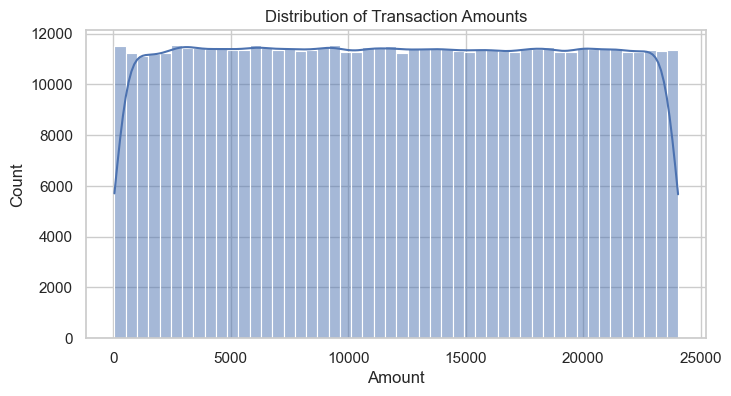

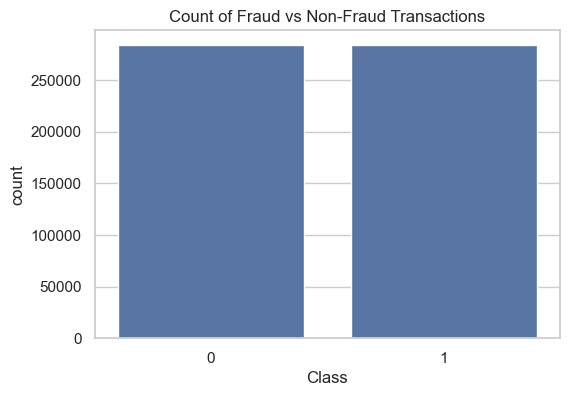

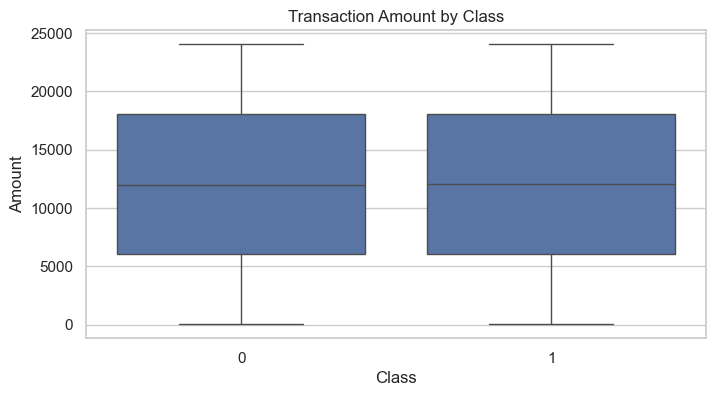

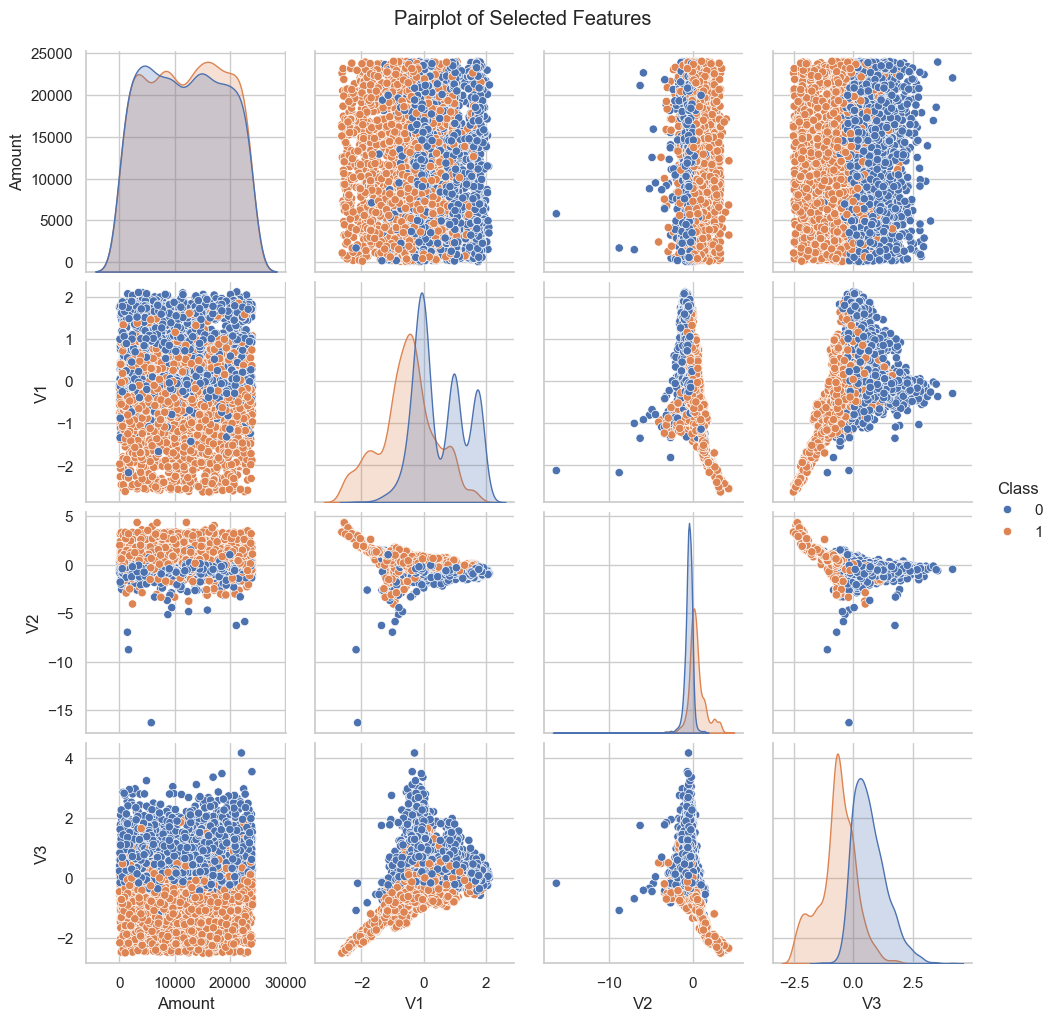

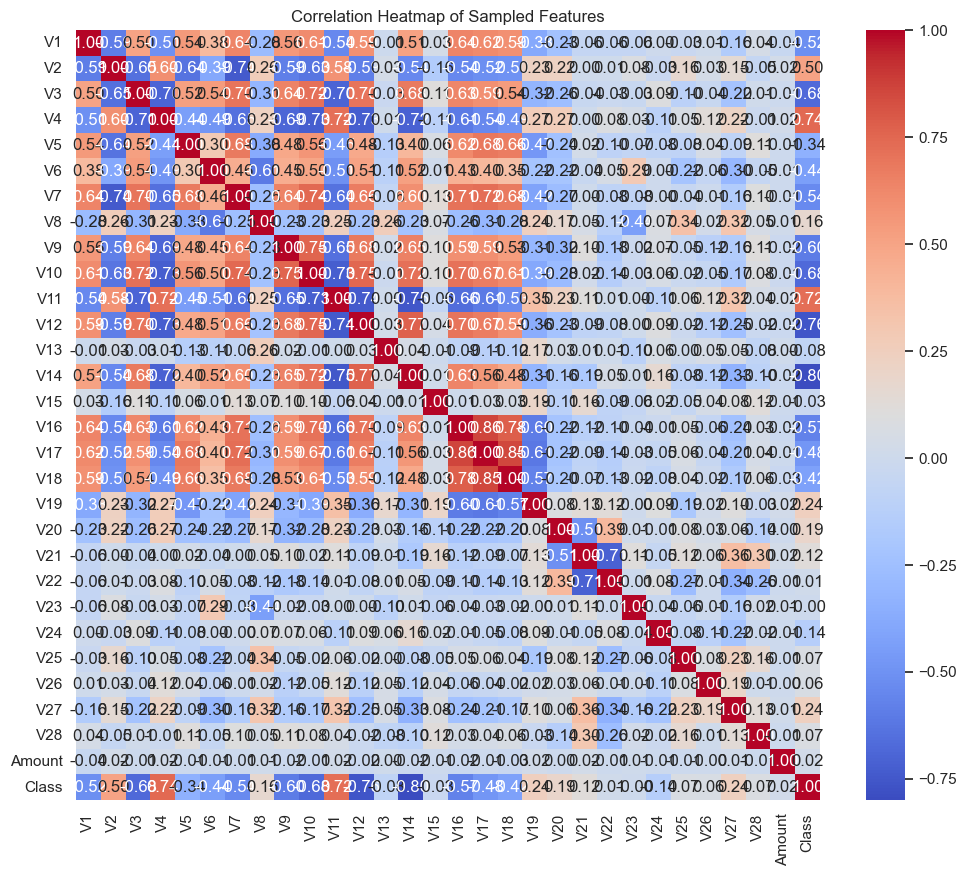

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Transaction Amount
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Countplot of Fraud vs Non-Fraud
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.show()

# Boxplot of Transaction Amount by Class
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

# Pairplot (sampled for performance, due to large dataset size)
sample_df = df.sample(5000, random_state=1)  # sample for faster plotting
sns.pairplot(sample_df, hue='Class', vars=['Amount', 'V1', 'V2', 'V3'])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Heatmap of Correlation Matrix (sampled for speed)
plt.figure(figsize=(12,10))
sns.heatmap(sample_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Sampled Features')
plt.show()


### Insghts:
Most transactions are small amounts; few are large.

Fraud and non-fraud counts are nearly equal.

Fraud transactions usually have higher amounts.

Some features help separate fraud from non-fraud.

Features mostly have low correlation, so detection is complex.